In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\George\Desktop\football-match-prediction\feature-enginnering\bundesliga.csv')

Text(0, 0.5, 'Total Goals')

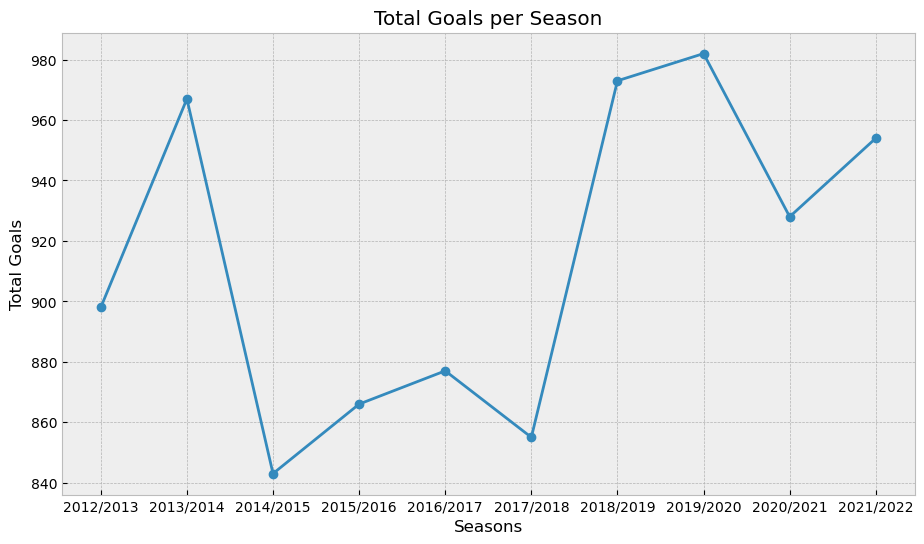

In [7]:
plt.figure(figsize=(11,6))

plt.plot(df['season'].unique(), df.groupby('season')['FTHG'].sum()+df.groupby('season')['FTAG'].sum(), marker = 'o')

plt.style.use('bmh')
plt.title('Total Goals per Season')
plt.xlabel('Seasons')
plt.ylabel('Total Goals')

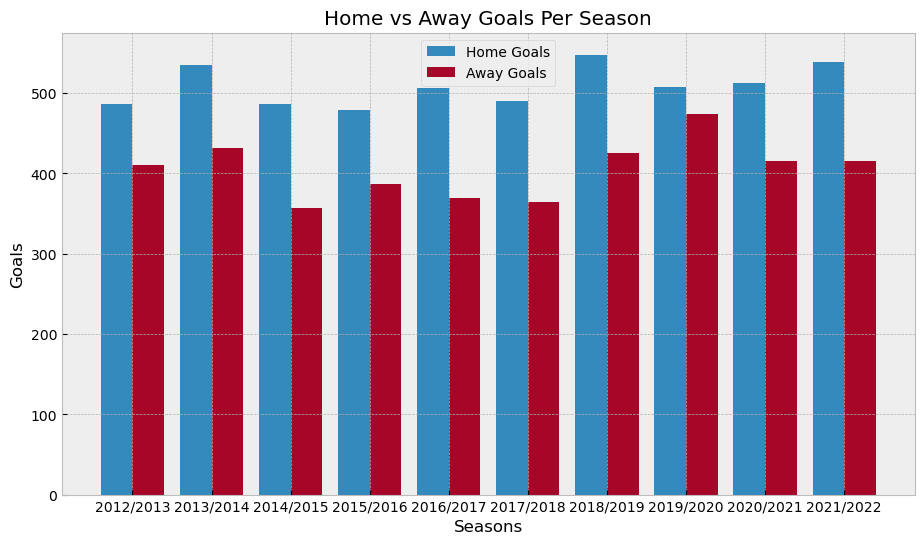

In [8]:
plt.figure(figsize=(11,6))

X_label = df['season'].unique()
X_axis = np.arange(len(df['season'].unique()))

plt.bar(X_axis - 0.2, df.groupby('season')['FTHG'].sum(),0.4, label = 'Home Goals')
plt.bar(X_axis + 0.2, df.groupby('season')['FTAG'].sum(),0.4, label = 'Away Goals')

plt.style.use('bmh')
plt.xticks(X_axis, X_label)
plt.title('Home vs Away Goals Per Season')
plt.xlabel('Seasons')
plt.ylabel('Goals')

plt.legend()

We can see that the total number of goals that the teams achieve at home turf , is every season higher than the
total number of goals the teams achieve at away turf.

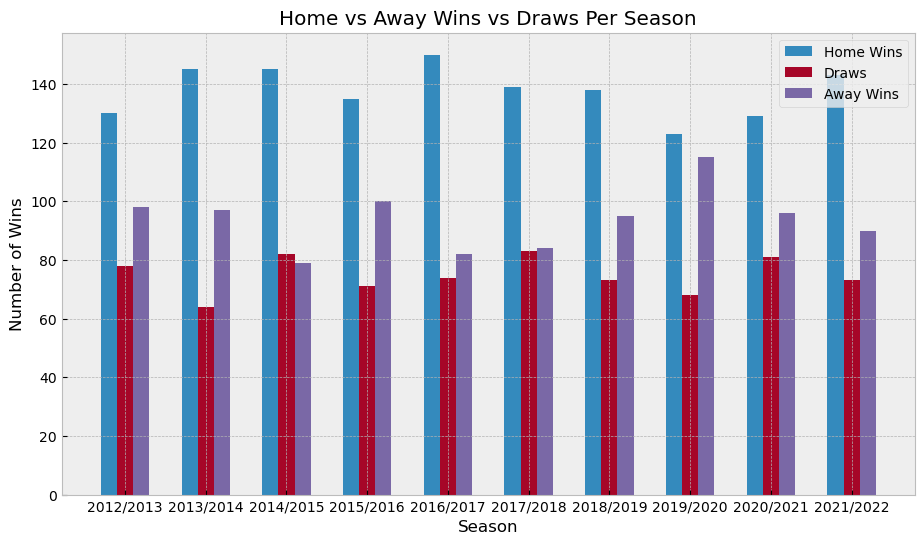

In [9]:
plt.figure(figsize=(11,6))

X_label = df['season'].unique()
X_axis = np.arange(len(df['season'].unique()))

plt.bar(X_axis - 0.2, df.groupby('season')['FTR'].apply(lambda x: (x == 'H').sum()),0.2, label = 'Home Wins')
plt.bar(X_axis, df.groupby('season')['FTR'].apply(lambda x: (x == 'D').sum()),0.2, label = 'Draws')
plt.bar(X_axis + 0.2, df.groupby('season')['FTR'].apply(lambda x: (x == 'A').sum()),0.2, label = 'Away Wins')

plt.style.use('bmh')
plt.xticks(X_axis, X_label)
plt.title('Home vs Away Wins vs Draws Per Season')
plt.xlabel('Season')
plt.ylabel('Number of Wins')

plt.legend()

The number of home wins are always higher that the number of away wins and the number of draws. It is something that we have anticipitated cause teams that are playing at home turf has an advantage cause of their fans.

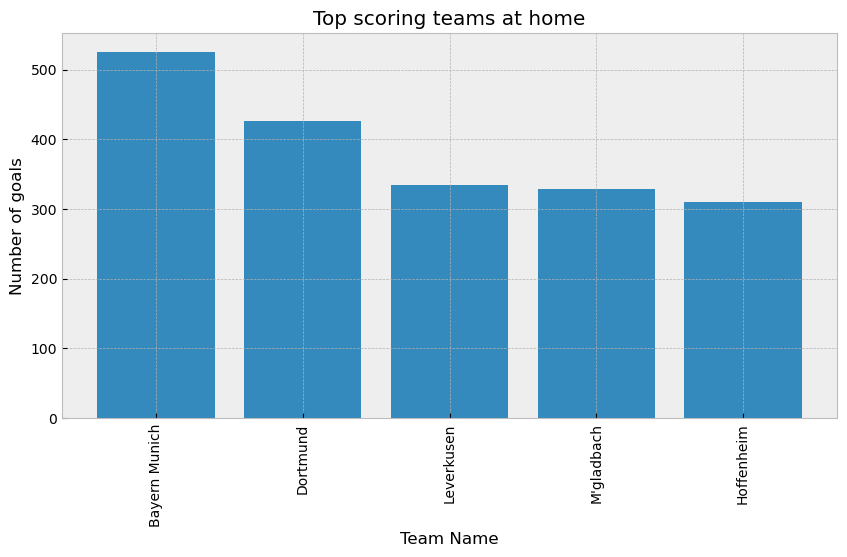

In [10]:
X_label = df.groupby('HomeTeam')['FTHG'].sum().sort_values(ascending=False).head(5).index

plt.figure(figsize=(10,5))

plt.bar(range(5),df.groupby('HomeTeam')['FTHG'].sum().sort_values(ascending=False).head(5))

plt.style.use('bmh')
plt.xticks(np.arange(5),X_label, rotation = 'vertical')
plt.xlabel('Team Name')
plt.ylabel('Number of goals')
plt.title('Top scoring teams at home')

plt.show()

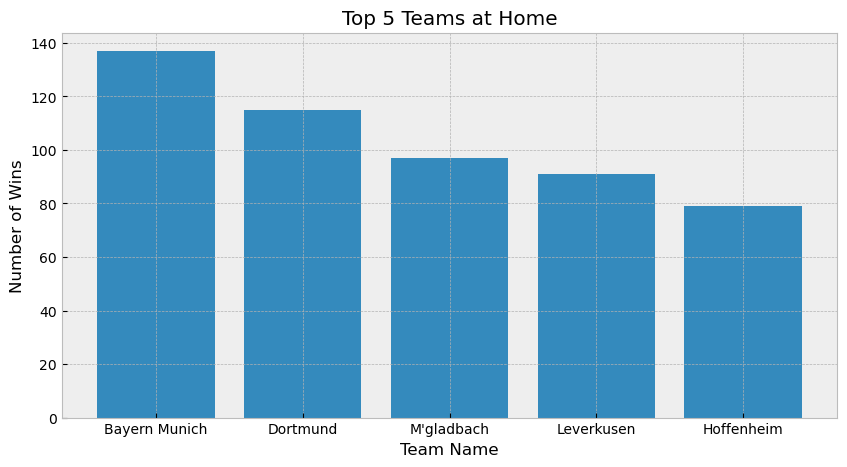

In [18]:
X_label = df.groupby('HomeTeam')['FTR'].apply(lambda x: (x == 'H').sum()).sort_values(ascending=False).head(5).index

plt.figure(figsize=(10,5))

plt.bar(range(5),df.groupby('HomeTeam')['FTR'].apply(lambda x: (x == 'H').sum()).sort_values(ascending=False).head(5))

plt.style.use('bmh')
plt.xticks(np.arange(5),X_label)
plt.title('Top 5 Teams at Home')
plt.xlabel('Team Name')
plt.ylabel('Number of Wins')

plt.show()

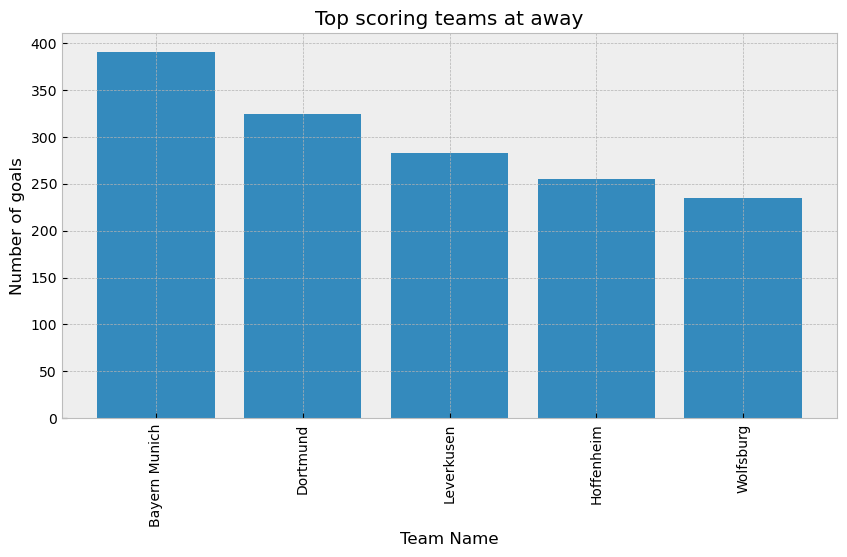

In [19]:
X_label = df.groupby('AwayTeam')['FTAG'].sum().sort_values(ascending=False).head(5).index

plt.figure(figsize=(10,5))

plt.bar(range(5),df.groupby('AwayTeam')['FTAG'].sum().sort_values(ascending=False).head(5))

plt.style.use('bmh')
plt.xticks(np.arange(5),X_label, rotation = 'vertical')
plt.xlabel('Team Name')
plt.ylabel('Number of goals')
plt.title('Top scoring teams at away')

plt.show()

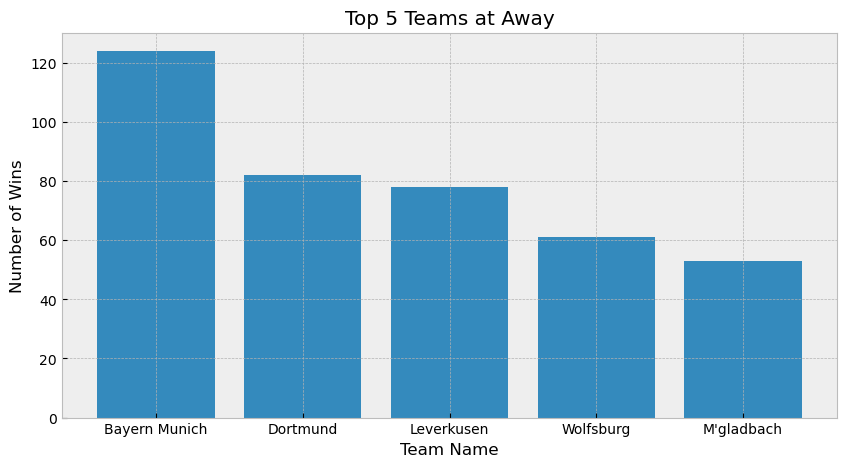

In [20]:
X_label = df.groupby('AwayTeam')['FTR'].apply(lambda x: (x == 'A').sum()).sort_values(ascending=False).head(5).index

plt.figure(figsize=(10,5))

plt.bar(range(5),df.groupby('AwayTeam')['FTR'].apply(lambda x: (x == 'A').sum()).sort_values(ascending=False).head(5))

plt.style.use('bmh')
plt.xticks(np.arange(5),X_label)
plt.title('Top 5 Teams at Away')
plt.xlabel('Team Name')
plt.ylabel('Number of Wins')

plt.show()

In [21]:
team_home_scored = df.groupby(['season','HomeTeam'])['FTHG'].sum()
team_home_scored = team_home_scored.rename_axis(['Season','Team Name'])

team_away_scored = df.groupby(['season','AwayTeam'])['FTAG'].sum()
team_away_scored = team_away_scored.rename_axis(['Season','Team Name'])


team_goals_scored = team_home_scored + team_away_scored

best_goalscoring_team = team_goals_scored.loc[team_goals_scored.groupby(level=0).idxmax()]

best_goalscoring_team

Season     Team Name    
2012/2013  Bayern Munich     98
2013/2014  Bayern Munich     94
2014/2015  Bayern Munich     80
2015/2016  Dortmund          82
2016/2017  Bayern Munich     89
2017/2018  Bayern Munich     92
2018/2019  Bayern Munich     88
2019/2020  Bayern Munich    100
2020/2021  Bayern Munich     99
2021/2022  Bayern Munich     97
dtype: int64

9 out of 10 time the team with the best attack won the championship.

In [22]:
team_home_conceded = df.groupby(['season','HomeTeam'])['FTAG'].sum()
team_home_conceded = team_home_conceded.rename_axis(['Season','Team Name'])

team_away_conceded = df.groupby(['season','AwayTeam'])['FTHG'].sum()
team_away_conceded = team_away_conceded.rename_axis(['Season','Team Name'])

#Number of goals each team conceded per season
team_goal_conceded = team_home_conceded + team_away_conceded

best_team_at_defense = team_goal_conceded.loc[team_goal_conceded.groupby(level=0).idxmin()]
best_team_at_defense

Season     Team Name    
2012/2013  Bayern Munich    18
2013/2014  Bayern Munich    23
2014/2015  Bayern Munich    18
2015/2016  Bayern Munich    17
2016/2017  Bayern Munich    22
2017/2018  Bayern Munich    28
2018/2019  RB Leipzig       29
2019/2020  Bayern Munich    32
2020/2021  RB Leipzig       32
2021/2022  Bayern Munich    37
dtype: int64

8 out of 10 times the team with the best defence won the championship.

In [23]:
overall_stats = team_goals_scored - team_goal_conceded
best_overall_stats = overall_stats.loc[overall_stats.groupby(level=0).idxmax()]
best_overall_stats

Season     Team Name    
2012/2013  Bayern Munich    80
2013/2014  Bayern Munich    71
2014/2015  Bayern Munich    62
2015/2016  Bayern Munich    63
2016/2017  Bayern Munich    67
2017/2018  Bayern Munich    64
2018/2019  Bayern Munich    56
2019/2020  Bayern Munich    68
2020/2021  Bayern Munich    55
2021/2022  Bayern Munich    60
dtype: int64

10 out of 10 times the team with the best overall stats won the championship. So we can imply that 
the the number of goal a team scores and concede play a significant role at the number of wins a team
has.

<AxesSubplot:xlabel='FTR', ylabel='count'>

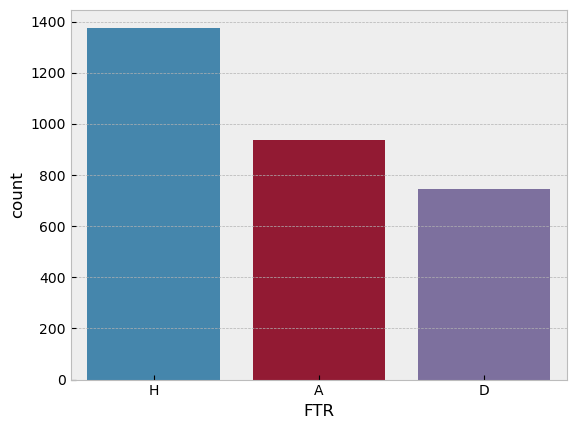

In [24]:
sns.countplot(x='FTR', data=df)

The number of home wins is much greater than that of the away wins and the draws. That probably has to do with the crowd attendance that gives a boost at home teams. Our data also indicates that we may have a difficulty to predict the draws.

<AxesSubplot:>

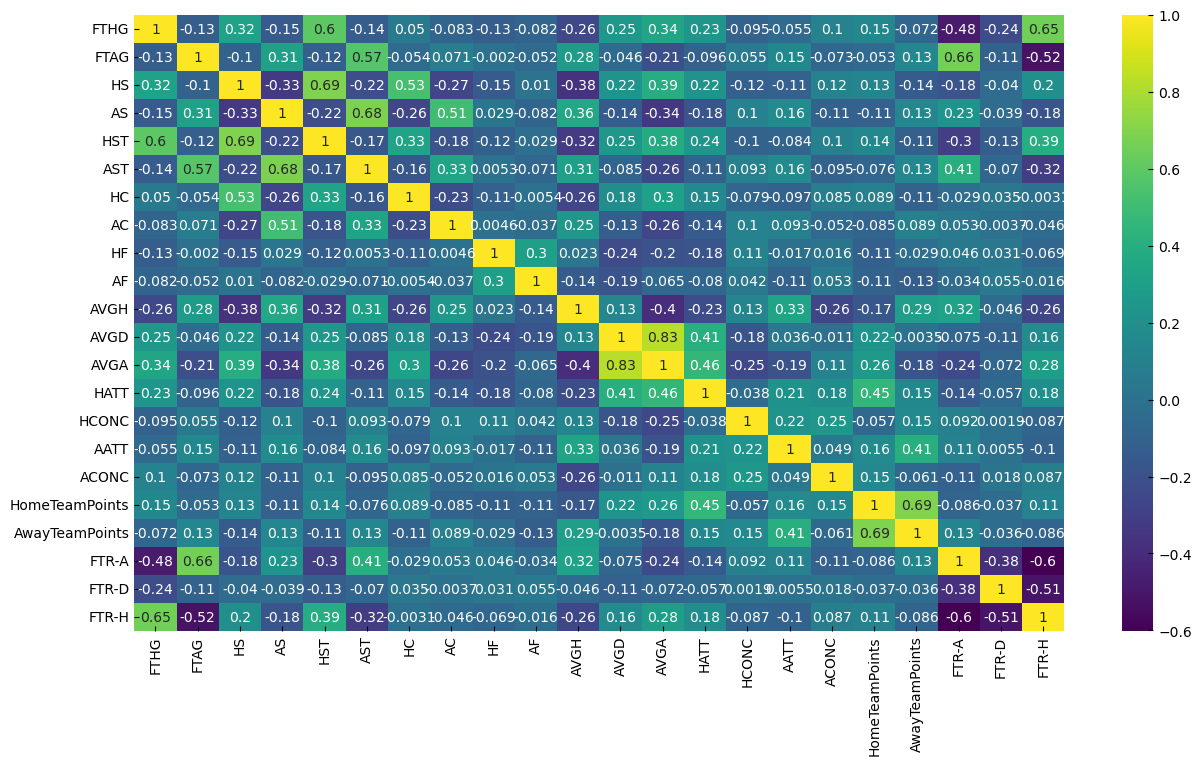

In [25]:
plt.figure(figsize=(15,8))
sns.heatmap(df.drop(['Date', 'HomeTeam', 'AwayTeam', 'Unnamed: 0'],axis=1).corr(),annot=True, cmap='viridis')

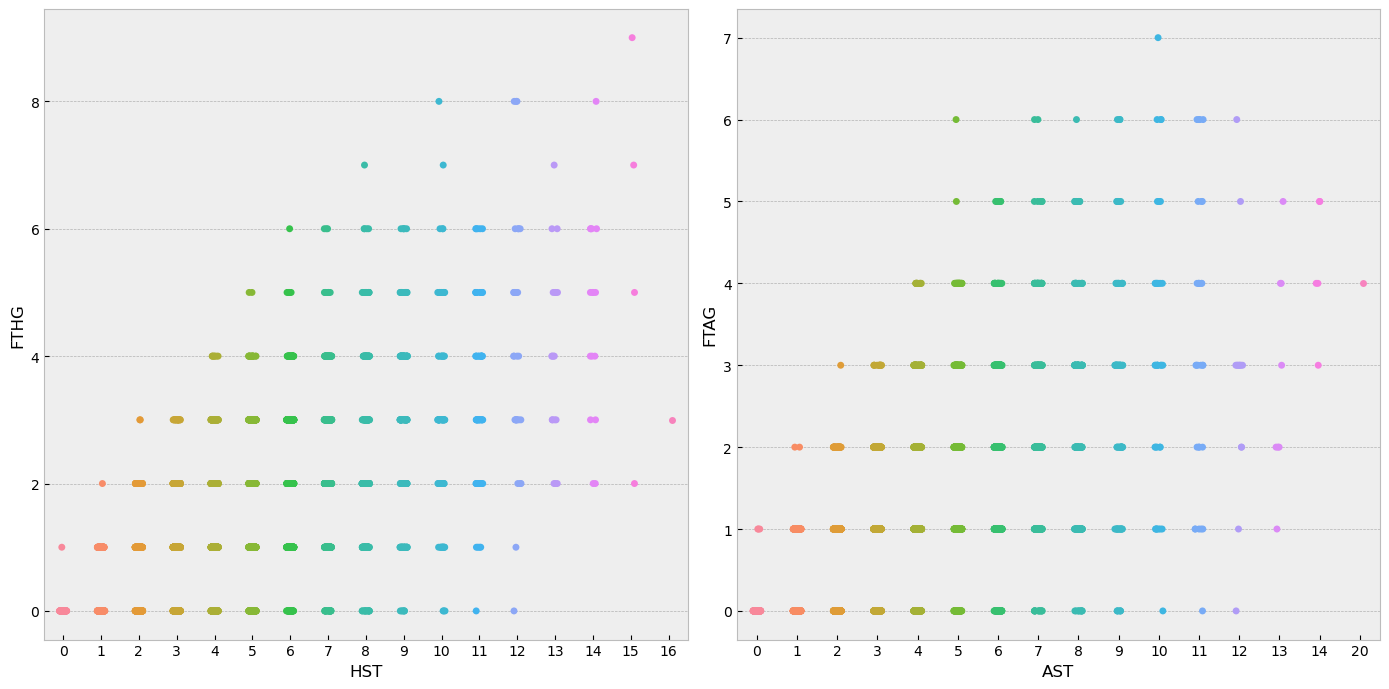

In [27]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 7.00]
plt.rcParams["figure.autolayout"] = True

sns.stripplot(x='HST', y='FTHG', data=df, jitter=True,ax = axes[0])
sns.stripplot(x='AST', y='FTAG', data=df, jitter=True,ax=axes[1])

plt.show()

We can see that as the number of shots on target for every team is getting higher, it is more possible to score a goal which is the main factor that affect the game result. Maybe a feature like the average of shots on target from match to match would be a good choice.

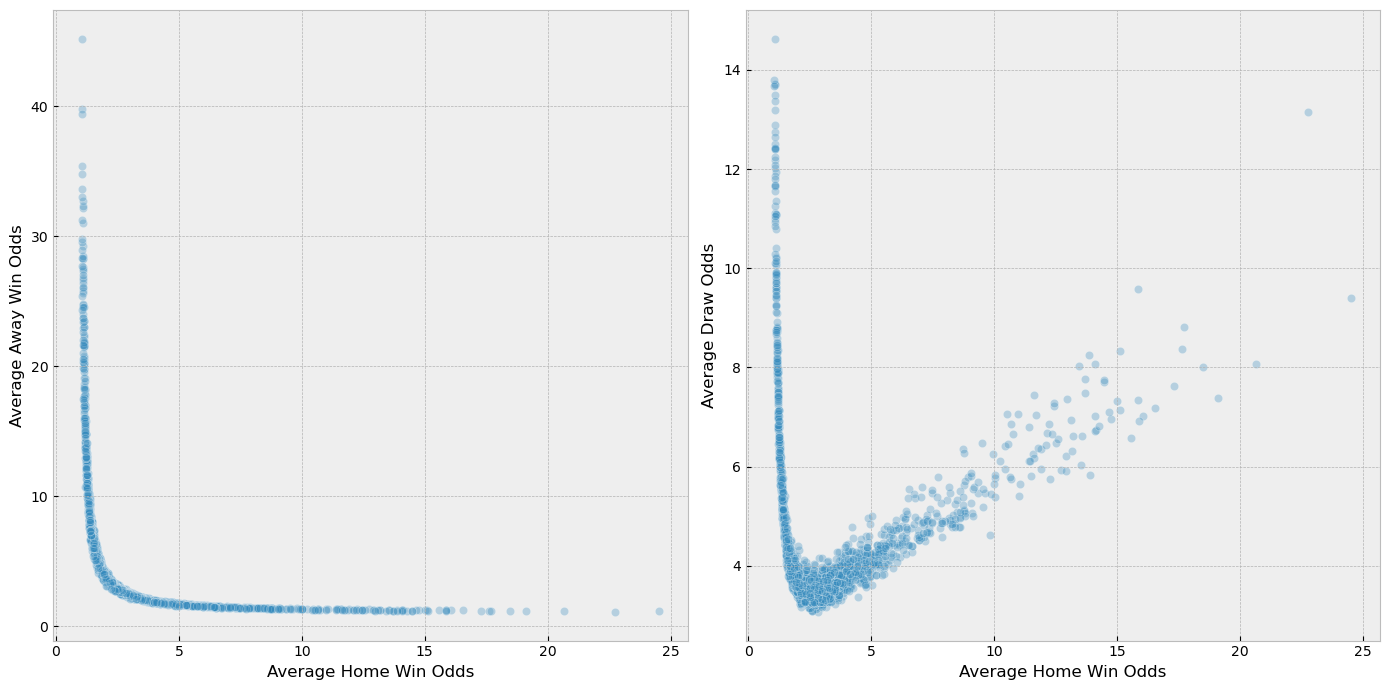

In [28]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 6.00]
plt.rcParams["figure.autolayout"] = True

sns.scatterplot(x='AVGH', y='AVGA', data=df, alpha=0.3, ax=axes[0])
axes[0].set_xlabel('Average Home Win Odds')
axes[0].set_ylabel('Average Away Win Odds')

sns.scatterplot(x='AVGH', y='AVGD', data=df, alpha=0.3, ax=axes[1])
axes[1].set_xlabel('Average Home Win Odds')
axes[1].set_ylabel('Average Draw Odds')

plt.show()

Text(0, 0.5, 'Average Draw Win Odds')

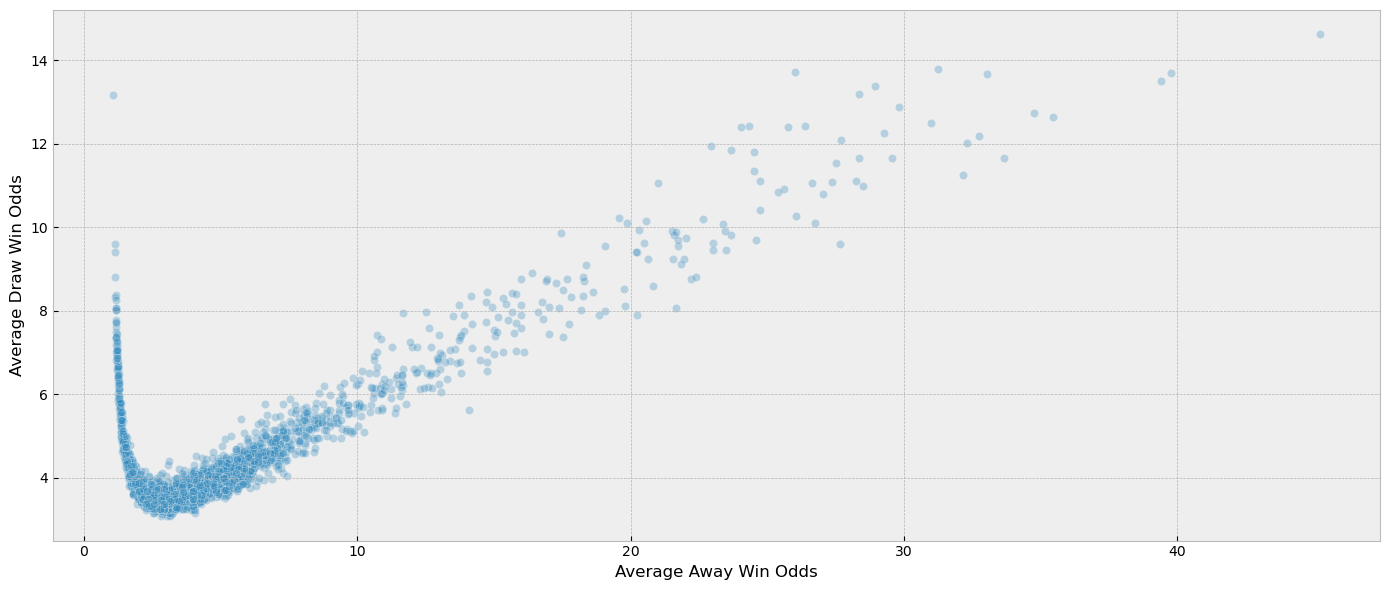

In [29]:
sns.scatterplot(x='AVGA', y='AVGD', data=df, alpha=0.3)
plt.xlabel("Average Away Win Odds")
plt.ylabel("Average Draw Win Odds")

As the price of the home win odd is getting lower the price of the away win odd is getting higher and vice versa. That has to do with the favorite to win the game.
When it comes to draw odd it is reasonable to take higher values as the differention of home and and away win odds is getting higher.

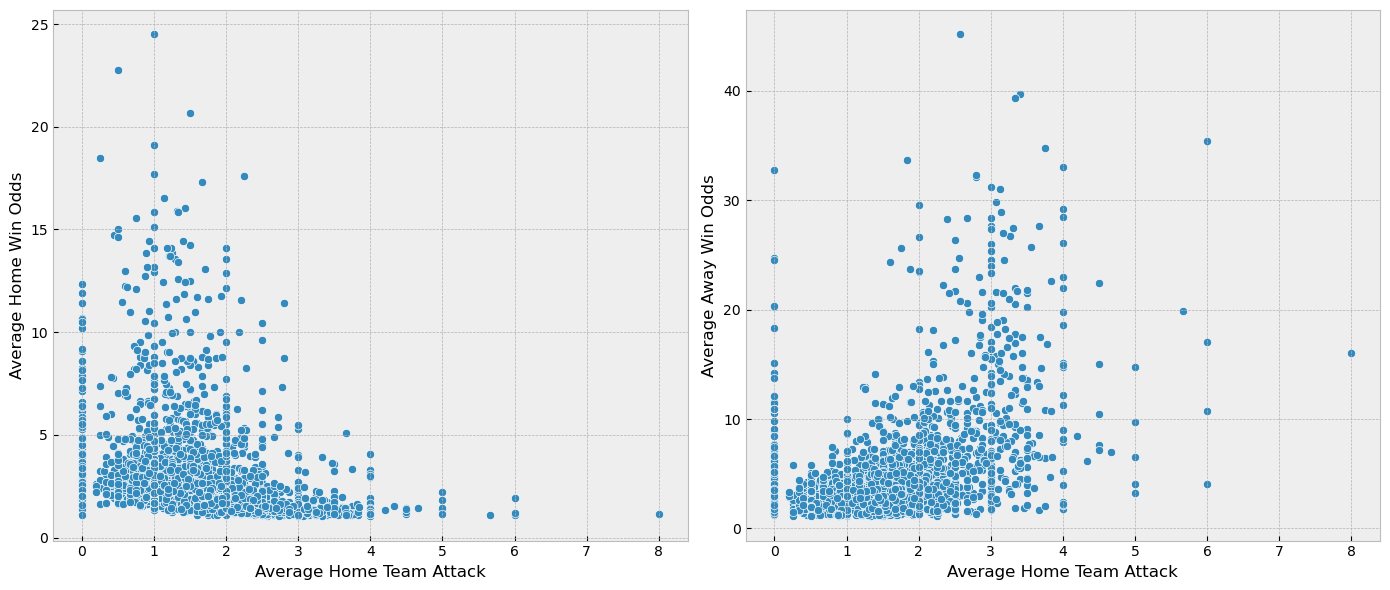

In [30]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 7.00]
plt.rcParams["figure.autolayout"] = True

sns.scatterplot(x='HATT', y='AVGH', data=df,ax = axes[0])
axes[0].set_xlabel('Average Home Team Attack')
axes[0].set_ylabel('Average Home Win Odds')

sns.scatterplot(x='HATT', y='AVGA', data=df,ax=axes[1])
axes[1].set_xlabel('Average Home Team Attack')
axes[1].set_ylabel('Average Away Win Odds')

plt.show()

We can see that as the home team attack is getting better, the home win odds are getting lower and the away win odds are getting higher. That is something that we have expected to happen, since the better stats the home team has the stronger it is. The points that have big deviation probably are after 2 or 3 matches from the beginning of the championship.

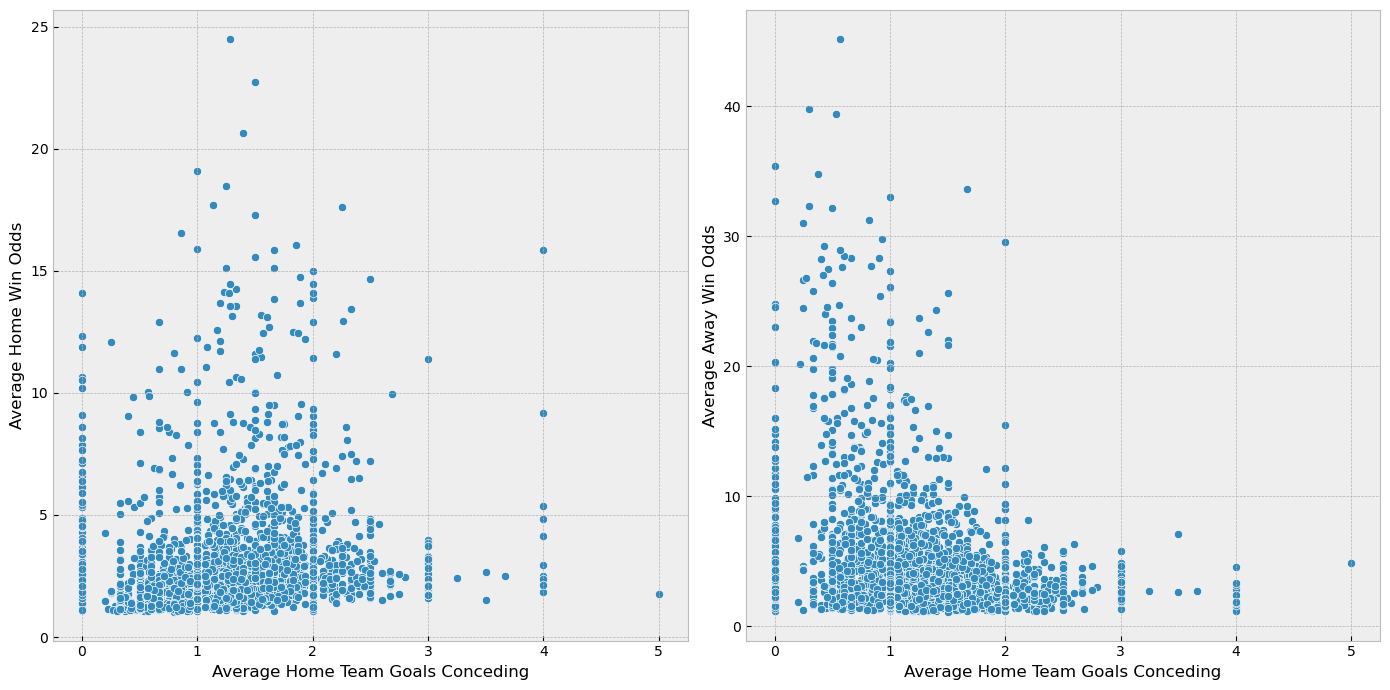

In [31]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 7.00]
plt.rcParams["figure.autolayout"] = True

sns.scatterplot(x='HCONC', y='AVGH', data=df,ax = axes[0])
axes[0].set_xlabel('Average Home Team Goals Conceding')
axes[0].set_ylabel('Average Home Win Odds')

sns.scatterplot(x='HCONC', y='AVGA', data=df,ax=axes[1])
axes[1].set_xlabel('Average Home Team Goals Conceding')
axes[1].set_ylabel('Average Away Win Odds')

plt.show()

We can see that when the home team doesn't concede a lot of goals the home win odds usually have lower price and the away win odds have high price. That is something that we have expected to happen, since the better stats the home team has the stronger it is. The points that have big deviation probably are after 2 or 3 matches from the beginning of the championship.

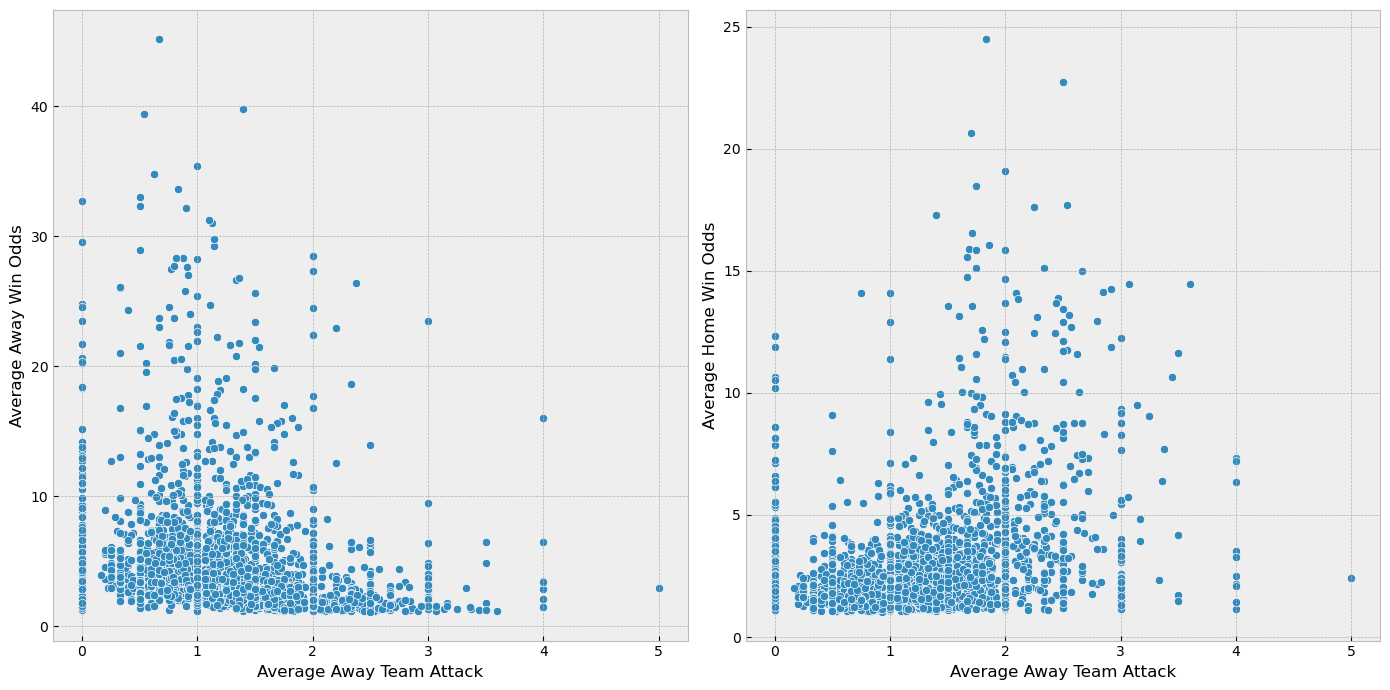

In [32]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 7.00]
plt.rcParams["figure.autolayout"] = True

sns.scatterplot(x='AATT', y='AVGA', data=df,ax = axes[0])
axes[0].set_xlabel('Average Away Team Attack')
axes[0].set_ylabel('Average Away Win Odds')

sns.scatterplot(x='AATT', y='AVGH', data=df,ax=axes[1])
axes[1].set_xlabel('Average Away Team Attack')
axes[1].set_ylabel('Average Home Win Odds')

plt.show()

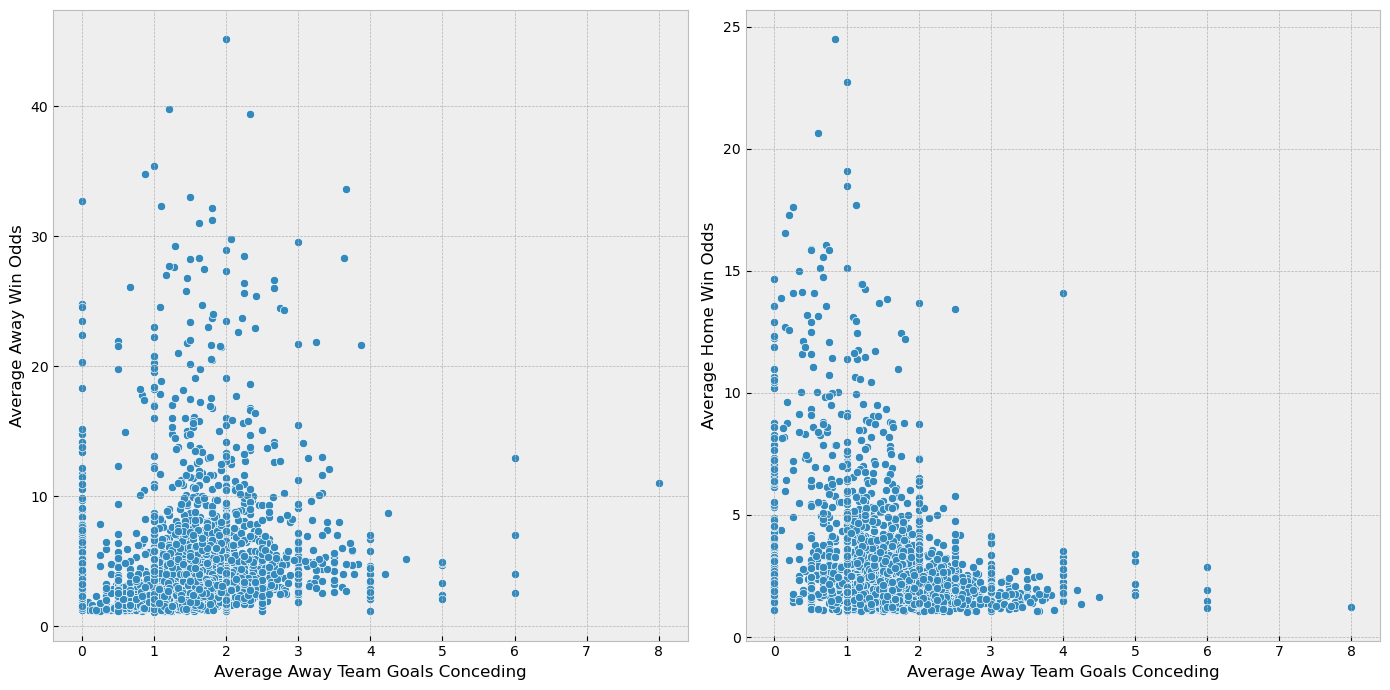

In [33]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 7.00]
plt.rcParams["figure.autolayout"] = True

sns.scatterplot(x='ACONC', y='AVGA', data=df,ax = axes[0])
axes[0].set_xlabel('Average Away Team Goals Conceding')
axes[0].set_ylabel('Average Away Win Odds')

sns.scatterplot(x='ACONC', y='AVGH', data=df,ax=axes[1])
axes[1].set_xlabel('Average Away Team Goals Conceding')
axes[1].set_ylabel('Average Home Win Odds')

plt.show()

As we expected the away performance stats of the teams has the same behaviour when it comes to winning odds.

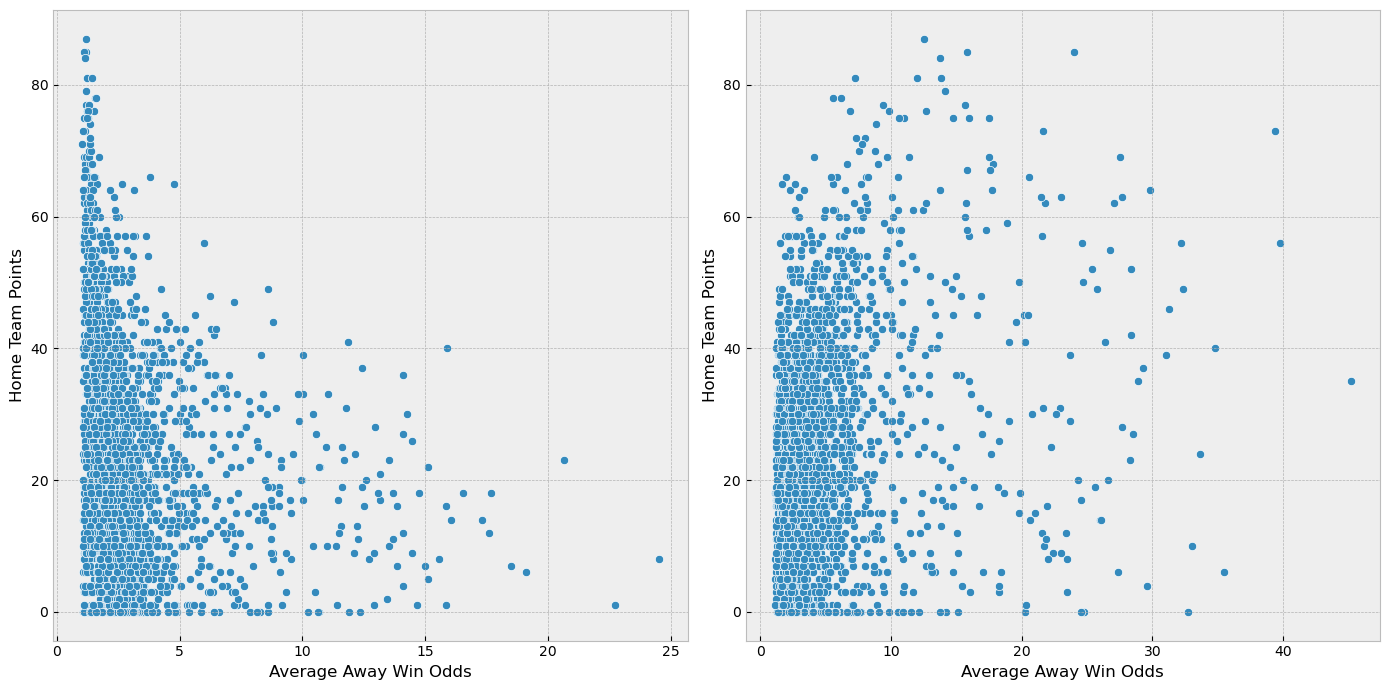

In [34]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 7.00]
plt.rcParams["figure.autolayout"] = True

sns.scatterplot(x='AVGH', y='HomeTeamPoints', data=df, ax = axes[0])
axes[0].set_xlabel('Average Away Win Odds')
axes[0].set_ylabel('Home Team Points')

sns.scatterplot(x='AVGA', y='HomeTeamPoints', data=df, ax=axes[1])
axes[1].set_xlabel('Average Away Win Odds')
axes[1].set_ylabel('Home Team Points')

plt.show()

Text(0, 0.5, 'Average Draw Win Odds')

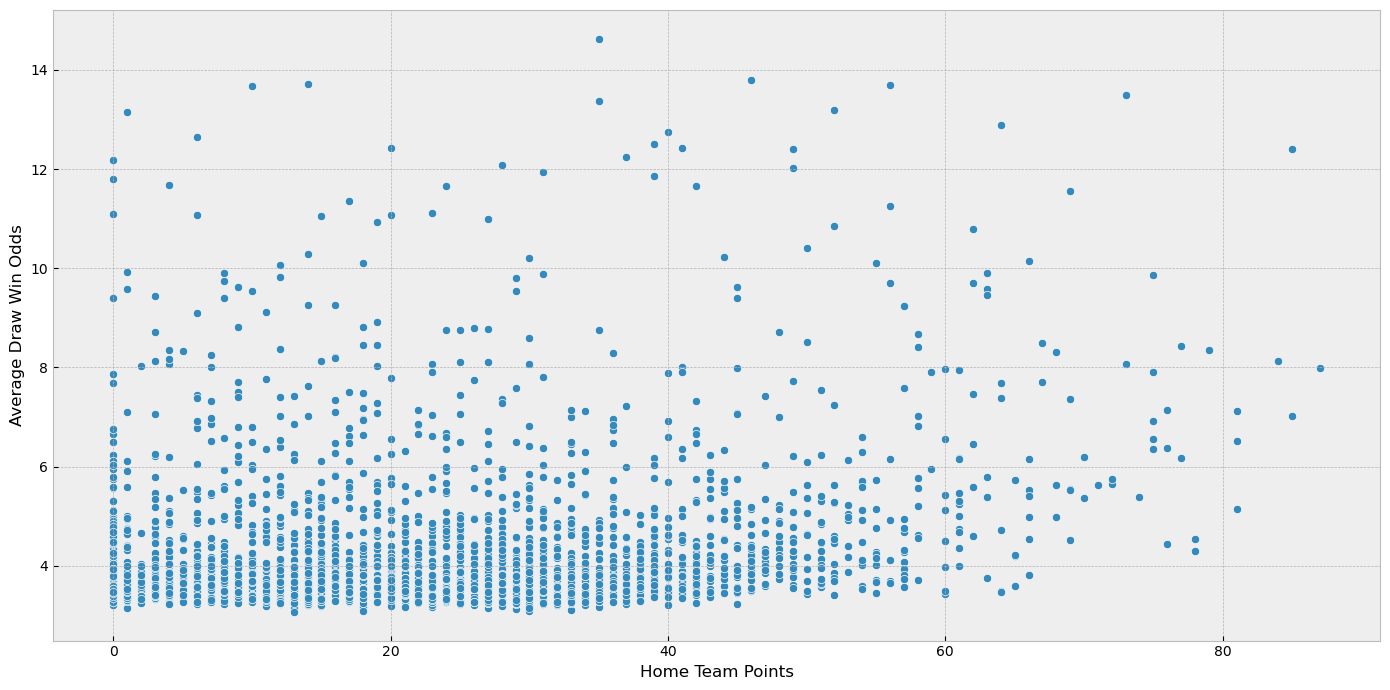

In [35]:
sns.scatterplot(x='HomeTeamPoints', y='AVGD', data=df)
plt.xlabel("Home Team Points")
plt.ylabel("Average Draw Win Odds")

The points that the home team has during the season affects the prices of the odds. Big number of points indicates that the team is strong, so the chaches for this team to win is high. As a cosnsequence the home win odd is getting lower and the other two are raising.

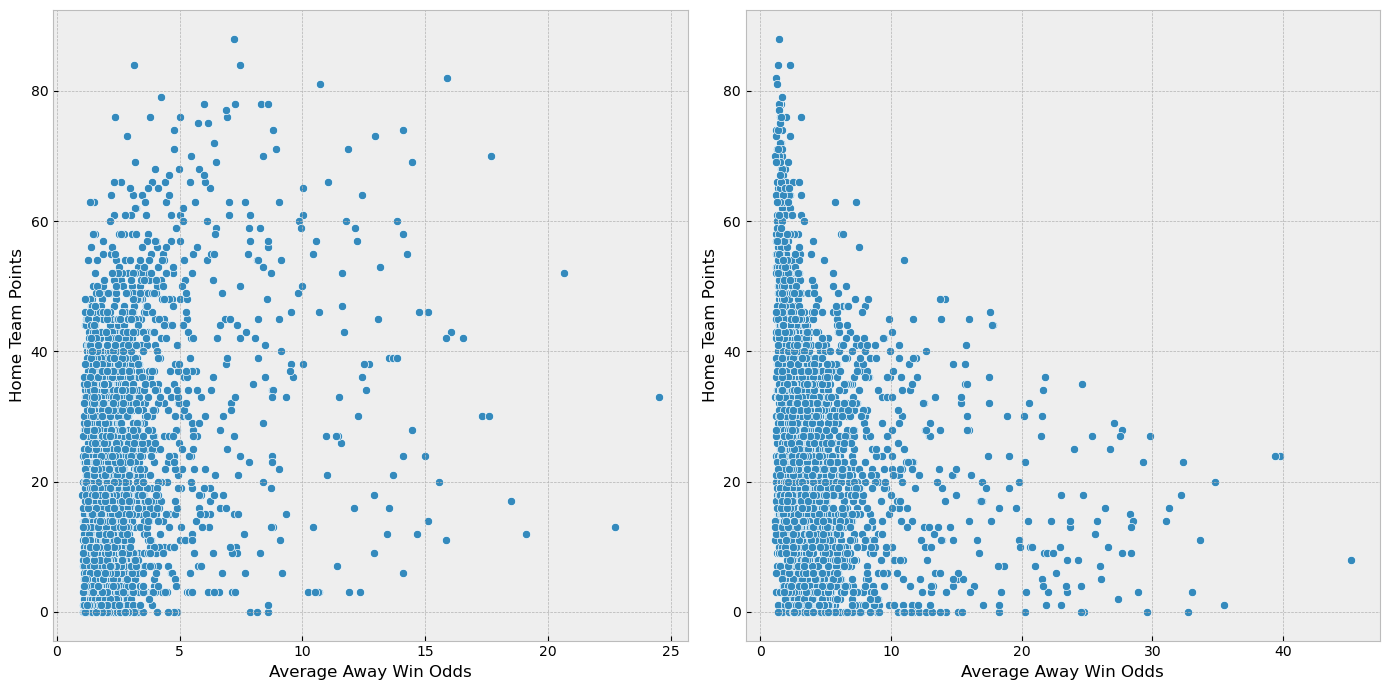

In [36]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 7.00]
plt.rcParams["figure.autolayout"] = True

sns.scatterplot(x='AVGH', y='AwayTeamPoints', data=df, ax = axes[0])
axes[0].set_xlabel('Average Away Win Odds')
axes[0].set_ylabel('Home Team Points')

sns.scatterplot(x='AVGA', y='AwayTeamPoints', data=df, ax=axes[1])
axes[1].set_xlabel('Average Away Win Odds')
axes[1].set_ylabel('Home Team Points')

plt.show()

Text(0, 0.5, 'Average Draw Win Odds')

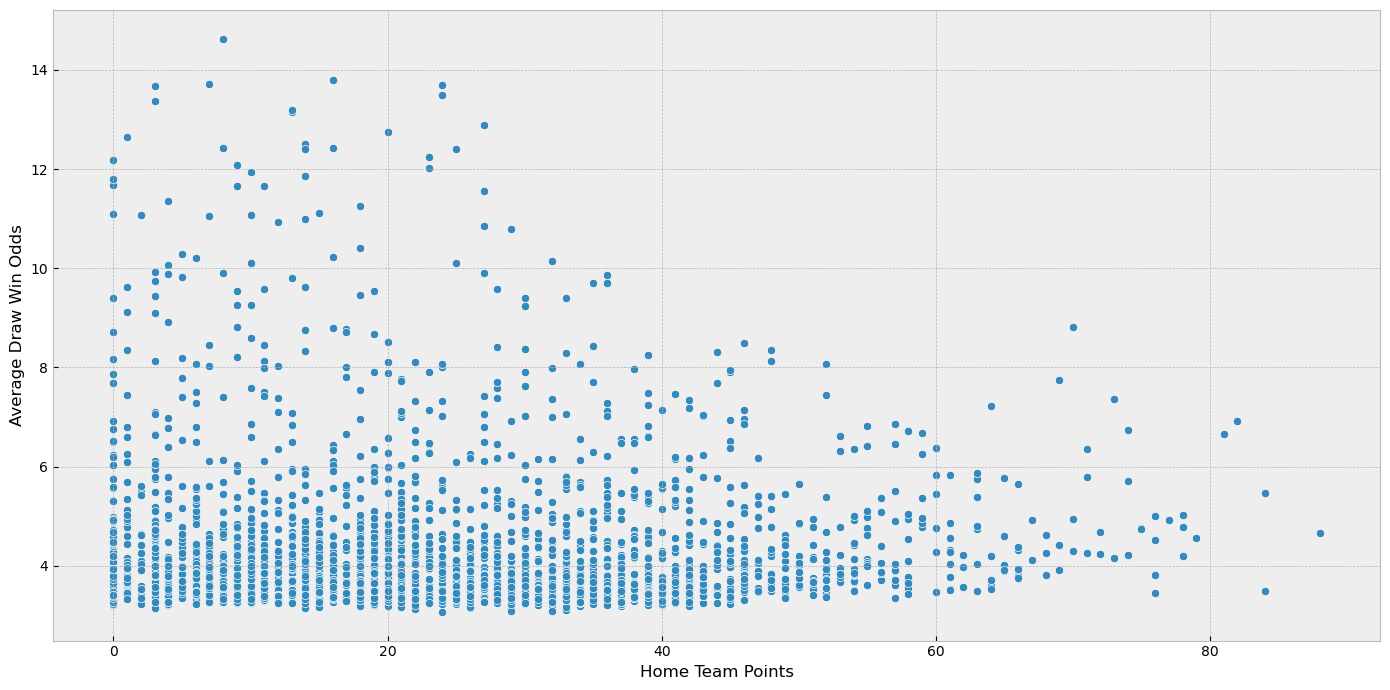

In [39]:
sns.scatterplot(x='AwayTeamPoints', y='AVGD', data=df)
plt.xlabel("Home Team Points")
plt.ylabel("Average Draw Win Odds")

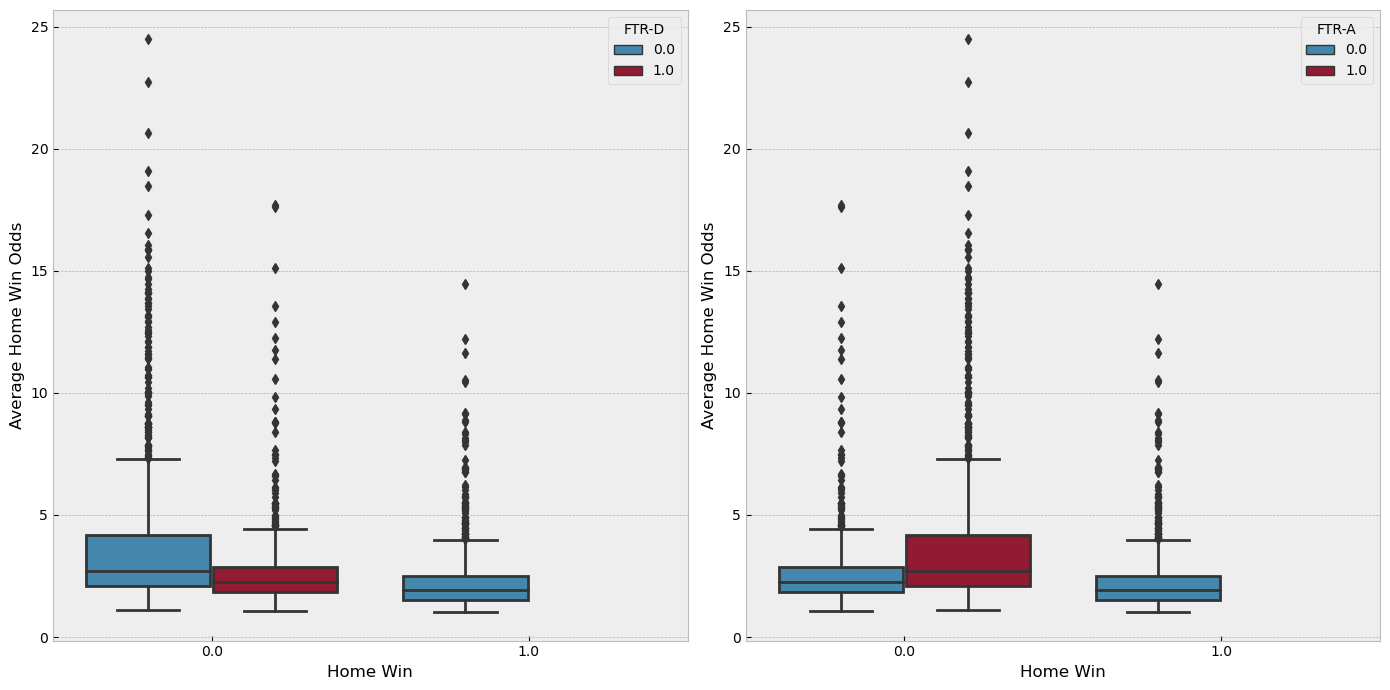

In [41]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 7.00]
plt.rcParams["figure.autolayout"] = True

sns.boxplot(x='FTR-H', y='AVGH', data=df, hue='FTR-D',ax = axes[0])
axes[0].set_xlabel('Home Win')
axes[0].set_ylabel('Average Home Win Odds')

sns.boxplot(x='FTR-H', y='AVGH', data=df, hue='FTR-A', ax=axes[1])
axes[1].set_xlabel('Home Win')
axes[1].set_ylabel('Average Home Win Odds')

plt.show()

We can see that low values of home win odds doesn't necessary mean that the home team is going to win. There are high chances that the away team is going to win the game, or at least achieve a draw. So having the home win odds as the main betting strategy probably is going to lead you at losses.

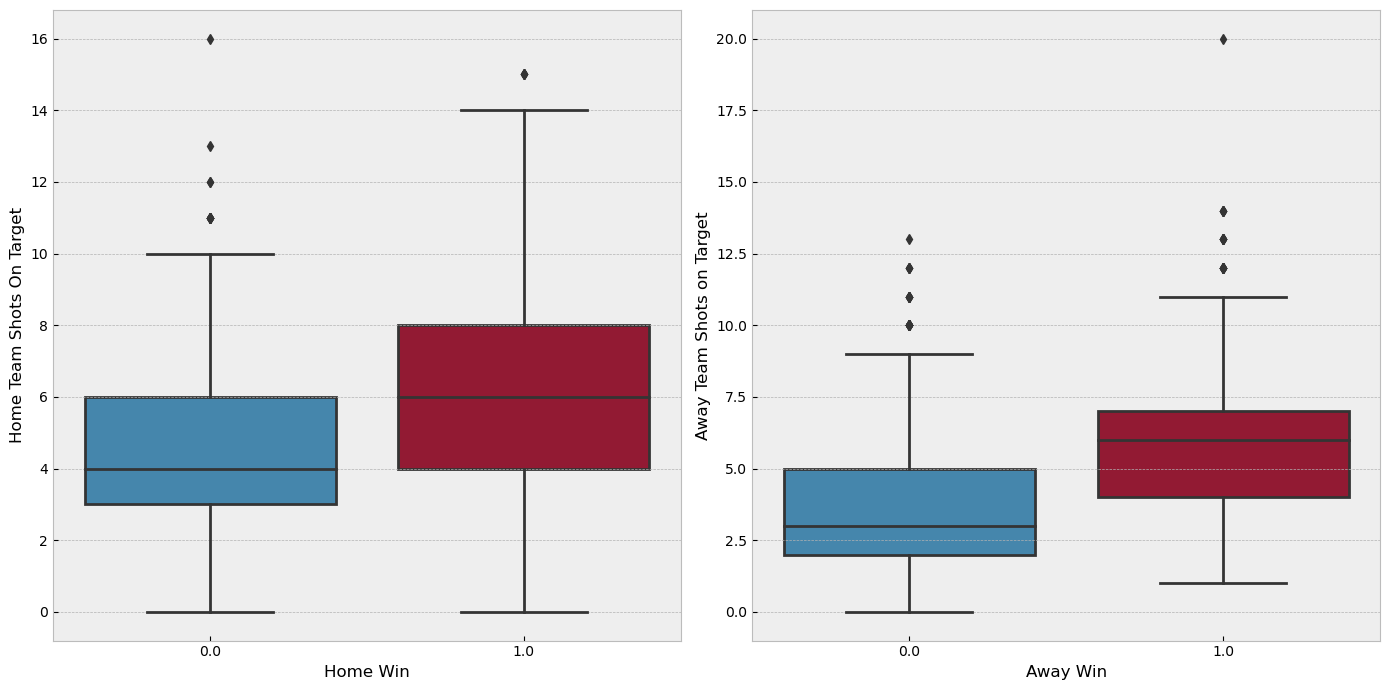

In [42]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 7.00]
plt.rcParams["figure.autolayout"] = True

sns.boxplot(x='FTR-H', y='HST', data=df, ax = axes[0])
axes[0].set_xlabel('Home Win')
axes[0].set_ylabel('Home Team Shots On Target')

sns.boxplot(x='FTR-A', y='AST', data=df, ax=axes[1])
axes[1].set_xlabel('Away Win')
axes[1].set_ylabel('Away Team Shots on Target')

plt.show()

A team that has a lot of shots on target probably is going to score a goal but that doesn't mean that this team is going to win the game. There are many cases when the team with the bigger number of shots on target didn't achieve to win. A team that creates a lot of opportunities to score for sure has higher chances to win, but stats don't always tell the whole story.